#**Sentiment NLP (Classification)**
**Abdallah Fekry Mohammed**

**NTI**


In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/Sentiment.csv')
df2.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
df2 = df2[['sentiment','text']]
df2.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [ ]:
df2.sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
df2.shape

(13871, 2)

In [ ]:
df2 = df2.drop(df2[df2['sentiment'] == 'Neutral'].index)

In [ ]:
df2.sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
df2.shape

(10729, 2)

In [ ]:
df2.iloc[0,1]

"RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…"

In [ ]:
df2.text.shape[0]

10729

In [ ]:
for i in range(df2.text.shape[0]):
  if df2.iloc[i,1].find('RT @') != -1 and df2.iloc[i,1].find(': ') != -1:
    df2.iloc[i,1] = (df2.iloc[i,1].split(': ',1)[1])
  df2.iloc[i,1] = ''.join(letter for letter in df2.iloc[i,1] if letter.isalnum() or letter.isspace()).lower()

In [ ]:
df2.iloc[0,1]

'didnt catch the full gopdebate last night here are some of scotts best lines in 90 seconds walker16 httptcozsff'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
df2.sentiment = df2.sentiment.astype('category').cat.codes
df2.sentiment.unique()

array([1, 0], dtype=int8)

In [ ]:
x = df2.iloc[:,1].values
y = df2.iloc[:,0].values


In [ ]:
t = Tokenizer()
t.fit_on_texts(x)

In [ ]:
x[0]

'didnt catch the full gopdebate last night here are some of scotts best lines in 90 seconds walker16 httptcozsff'

In [ ]:
encoded = t.texts_to_sequences(x)

In [ ]:
encoded[0]

[119,
 2267,
 1,
 698,
 2,
 38,
 57,
 231,
 35,
 204,
 6,
 3968,
 169,
 1682,
 12,
 1265,
 1347,
 720,
 5822]

In [ ]:
x = pad_sequences(encoded, maxlen=500)
x.shape

(10729, 500)

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=1)
x_train.shape

(8583, 500)

In [ ]:
model = Sequential()
model.add(Embedding(8583,64,input_length=500))
model.add(LSTM(16))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 500, 64)           549312    
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 554513 (2.12 MB)
Trainable params: 554513 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train, epochs=20, verbose=2, validation_data=(x_test,y_test),
          callbacks=EarlyStopping(patience=5,restore_best_weights=True))

Epoch 1/20
269/269 - 20s - loss: 0.4399 - accuracy: 0.8158 - val_loss: 0.3764 - val_accuracy: 0.8523 - 20s/epoch - 73ms/step
Epoch 2/20
269/269 - 6s - loss: 0.2787 - accuracy: 0.8841 - val_loss: 0.3499 - val_accuracy: 0.8621 - 6s/epoch - 21ms/step
Epoch 3/20
269/269 - 6s - loss: 0.2033 - accuracy: 0.9210 - val_loss: 0.3829 - val_accuracy: 0.8411 - 6s/epoch - 23ms/step
Epoch 4/20
269/269 - 5s - loss: 0.1608 - accuracy: 0.9400 - val_loss: 0.4178 - val_accuracy: 0.8458 - 5s/epoch - 19ms/step
Epoch 5/20
269/269 - 6s - loss: 0.1293 - accuracy: 0.9504 - val_loss: 0.4491 - val_accuracy: 0.8490 - 6s/epoch - 21ms/step
Epoch 6/20
269/269 - 5s - loss: 0.1139 - accuracy: 0.9561 - val_loss: 0.4558 - val_accuracy: 0.8383 - 5s/epoch - 17ms/step
Epoch 7/20
269/269 - 5s - loss: 0.0983 - accuracy: 0.9619 - val_loss: 0.4980 - val_accuracy: 0.8327 - 5s/epoch - 19ms/step


In [ ]:
loss ,acc = model.evaluate(x_test,y_test)
acc*100

68/68 [==============================] - 1s 10ms/step - loss: 0.3499 - accuracy: 0.8621


86.20689511299133

In [ ]:
yp = model.predict(x_test)
yp

68/68 [==============================] - 1s 8ms/step


array([[0.02850553],
       [0.01068596],
       [0.01871045],
       ...,
       [0.00813152],
       [0.53736603],
       [0.29935655]], dtype=float32)

In [ ]:
yp = (yp>0.5).astype(int)
yp

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yp)

array([[1588,  107],
       [ 189,  262]])

In [ ]:
y_test.shape

(2146,)

Sentiment Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

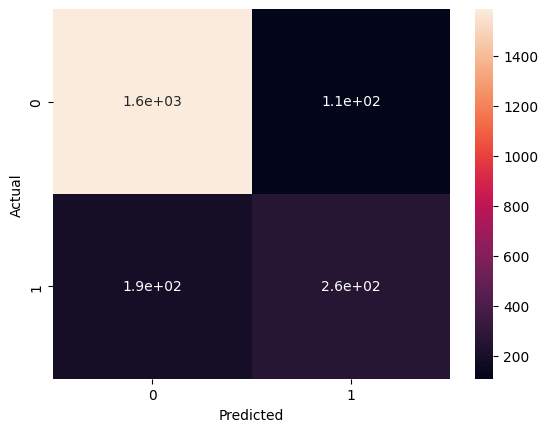

In [ ]:
import seaborn as sn
print("Sentiment Heatmap\n")
m = pd.crosstab(y_test, yp.reshape(y_test.shape), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m, annot=True)


In [ ]:
yp[0,0]

0

In [ ]:
x_test[0].shape

(500,)

In [ ]:
y_test[0]

0

-> run these cell everytime will predict a random value from x_test <-

In [ ]:
import random as r
# where n is a random index in y_test
n = r.randint(0,len(x_test))
yp1 = (model.predict(x_test[n].reshape(1,500))>=0.5).astype(int)
print("at index '{}' in x_test \nreview: \"{}\" \nPredicted value = class '{}' \nActual value    = class '{}'".format(n, df2.iloc[n,1], yp1[0,0] ,y_test[n]))

1/1 [==============================] - 0s 23ms/step
at index '1218' in x_test 
review: "fox news must be taking marching orders from rnc by their treatment of cruz and trump and carson gopdebate" 
Predicted value = class '0' 
Actual value    = class '0'
